In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import os 
import warnings 
warnings.filterwarnings('ignore')

C:\Users\Lakki\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('C:\\Personal Documents\\Data Scientist\\Kaggle EDA practice\\World Happiness 2021 Visualization')

In [3]:
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

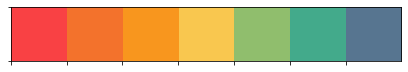

In [5]:
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

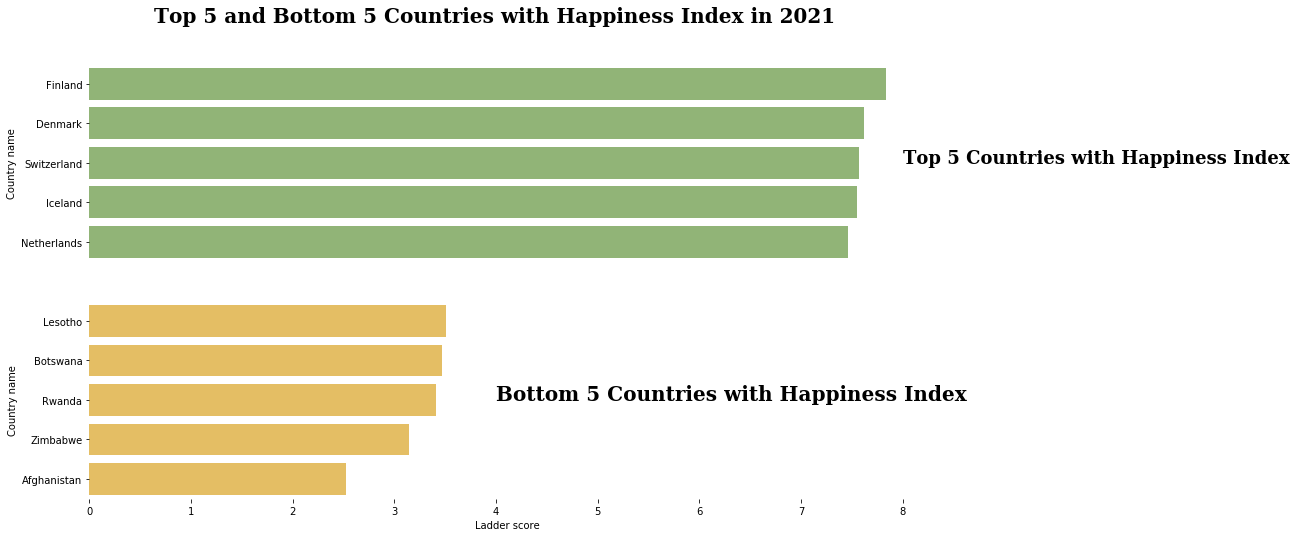

In [6]:
fig = plt.figure(figsize=(15,8))
g = gs.GridSpec(2,1,figure=fig)
top5= df.head(5)
bot5= df.tail(5)
a = plt.subplot(g[0,0])
a.xaxis.set_visible(False)
a.annotate('Top 5 Countries with Happiness Index', xy=(8,2), size=18, weight='bold', family='Serif')
plt.suptitle('Top 5 and Bottom 5 Countries with Happiness Index in 2021', family='Serif', size=20, weight='bold')
sns.barplot(data=top5, x=top5['Ladder score'], y=top5['Country name'],color=color[4])

b=plt.subplot(g[1,0], sharex=a)
b.annotate('Bottom 5 Countries with Happiness Index', xy=(4,2), family='Serif', weight='bold', size=20)
sns.barplot(data=bot5, x=bot5['Ladder score'], y=bot5['Country name'], color=color[3])

for s in ['right','left','top','bottom']:
    a.spines[s].set_visible(False)
    b.spines[s].set_visible(False)

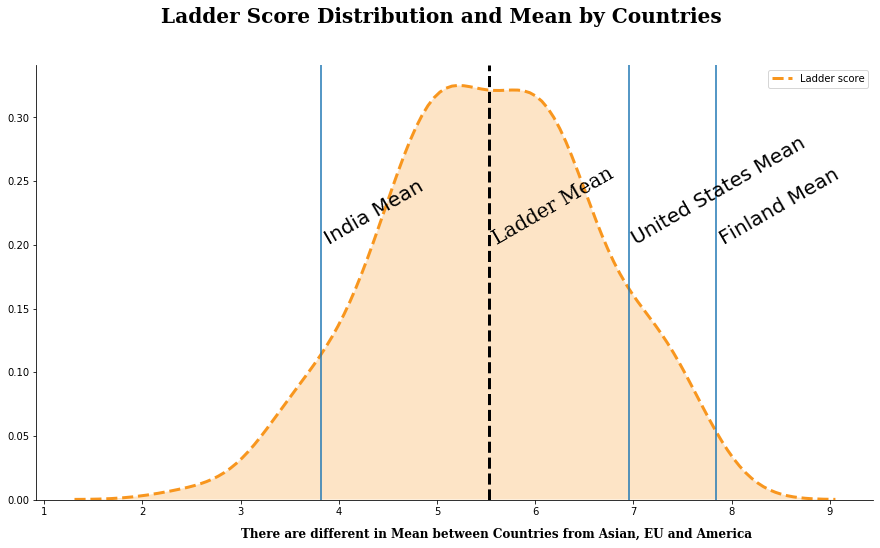

In [7]:
fig = plt.figure(figsize=(15,8))
plt.suptitle('Ladder Score Distribution and Mean by Countries', family='Serif', size=20, weight='bold')

sns.kdeplot(data=df['Ladder score'], shade=True, linewidth=3, ls='--', c=color[2])
plt.axvline(x=df['Ladder score'].mean(), c='black', ls='--', linewidth=3 )
plt.text(x=df['Ladder score'].mean(),y=0.2,s='Ladder Mean', rotation=30, family='Serif', size=20)

plt.axvline(x=df[df['Country name']=='Finland']['Ladder score'].mean())
plt.text(x=df[df['Country name'] == 'Finland']['Ladder score'].mean(), y=0.2,s='Finland Mean', size=20, rotation=30)

plt.axvline(x=df[df['Country name']=='India']['Ladder score'].mean())
plt.text(x=df[df['Country name'] == 'India']['Ladder score'].mean(), y=0.2, s='India Mean', size=20, rotation=30)

plt.axvline(x=df[df['Country name']=='United States']['Ladder score'].mean())
plt.text(x=df[df['Country name']=='United States']['Ladder score'].mean(), y=0.2,s='United States Mean', size=20, rotation=30)
plt.text(x=3,y=-0.03,s='There are different in Mean between Countries from Asian, EU and America', size=12, family='Serif', weight='bold')
for s in ['right','top']:
    plt.gca().spines[s].set_visible(False)

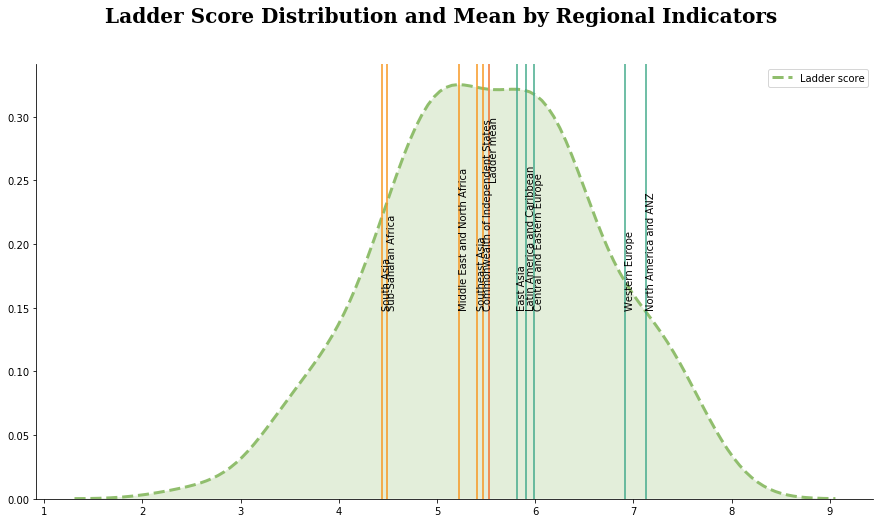

In [8]:
fig = plt.figure(figsize=(15,8))
plt.suptitle('Ladder Score Distribution and Mean by Regional Indicators', family='Serif',weight='bold',size=20)

sns.kdeplot(df['Ladder score'], shade=True, linewidth=3, color=color[4], ls='--')
plt.axvline(x=df['Ladder score'].mean(), c=color[1])
plt.text(x=df['Ladder score'].mean(), y=0.25, s='Ladder mean', rotation=90)
pop = df['Ladder score'].mean()
for i in df['Regional indicator'].unique():
    m = df[df['Regional indicator']==i]['Ladder score'].mean()
    if m>pop:
        c=color[5]
    else:
        c=color[2]
    plt.axvline(x=m, color=c)
    plt.text(x=m, y=0.15,s=i, rotation=90)

for s in ['right','top']:
    plt.gca().spines[s].set_visible(False)

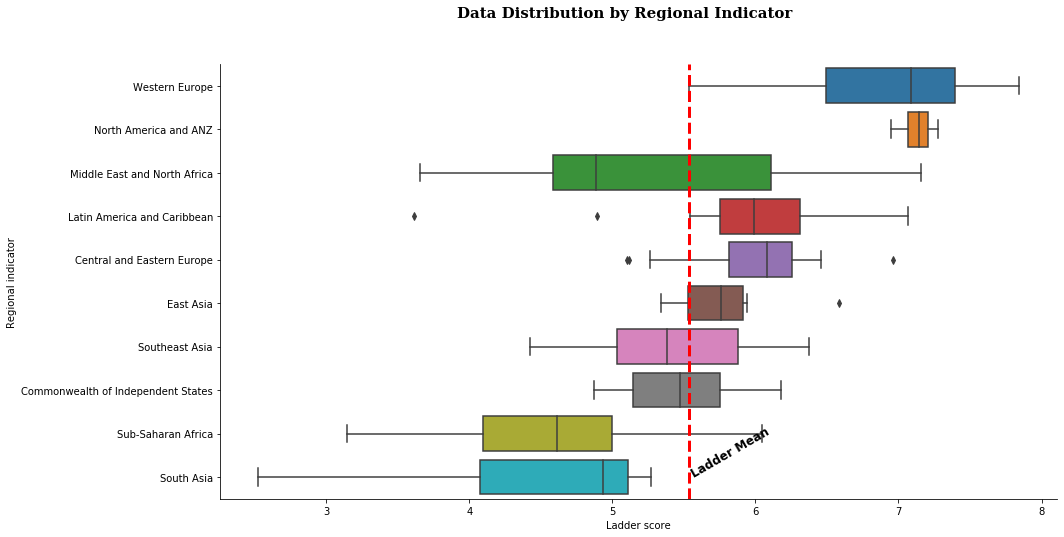

In [9]:
fig=plt.figure(figsize=(15,8))
plt.suptitle('Data Distribution by Regional Indicator', family='Serif', size=15, weight='bold')
sns.boxplot(data=df,x='Ladder score',y='Regional indicator')
plt.axvline(df['Ladder score'].mean(), linewidth=3, color='red', ls='--')
plt.text(x=df['Ladder score'].mean(),y=9, s='Ladder Mean', weight='bold',size=12, rotation=30)
for i in ['right','top']:
    plt.gca().spines[i].set_visible(False)

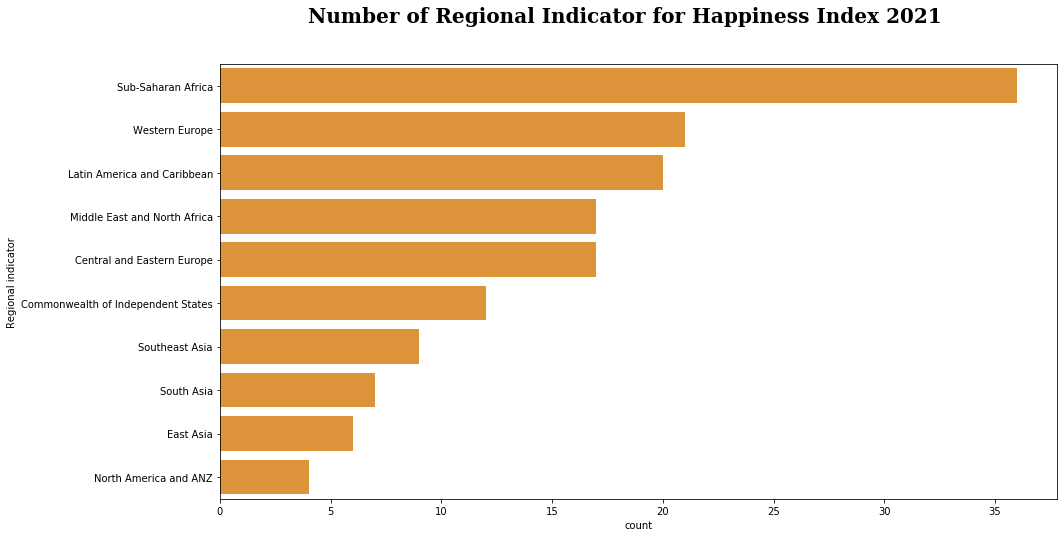

In [10]:
fig = plt.figure(figsize=(15,8))
plt.suptitle('Number of Regional Indicator for Happiness Index 2021', weight='bold',size=20,family='Serif', ha='center')
sns.countplot(data=df, y='Regional indicator', color=color[2], order=df['Regional indicator'].value_counts().index)

In [11]:
df2=df[['Country name', 'Regional indicator', 'Ladder score',
        'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

In [12]:
col = df2.corr()['Ladder score'].sort_values(ascending=False)

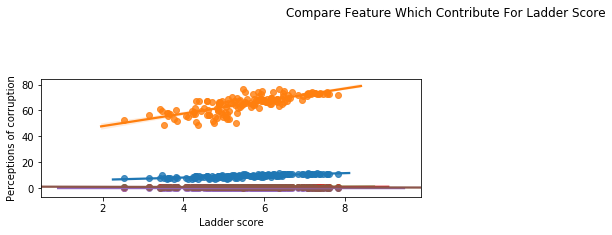

In [13]:
fig = plt.figure(figsize=(15,10))
plt.suptitle('Compare Feature Which Contribute For Ladder Score')
j=0
ax= plt.subplot(421+j)
for i in col.index[1:]:
    sns.regplot(data=df2, x='Ladder score', y=i)
    j=j+1